In [1]:
# RNN, LSTM
# 입력과 출력이 시퀀스 단위로 처리

In [2]:
from tensorflow.keras.layers import SimpleRNN

In [4]:
'''
model.add(SimpleRNN(hidden_units))
hidden_units = 히든상태의 크기(rnn 출력), 통상적으로 2의n승, 규모가 크면 숫자값을 크게줌
timesteps = 입력 시퀀스의 길이(input_length, 시점의 수)
input_dim = 입력의 차원(주가예측 예시에서는 1차원, 다음 단어 예측 예시에서는 4차원(인코딩 된 단어들의 전체개수))

ex) 10일간 주가 데이터 -> 다음 날 주가 예측
10 9 8 ... 2 1

문장 입력 -> 다음 단어 예측
나는 지금 rnn 공부를

코퍼스를 구성하는 단어 종류 1000개 -> 1000차원

ex) 나는(index 번호가 3번이면)
0001000...000
<- 길이 1000 ->

model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))
model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N)))
위 두 코드는 같은 표현
M에는 timesepts, N에는 input_dim을 기술함

모델 : 영화 리뷰 감성(긍/부) 분석기 제작
5000개 리뷰(문장), 라벨(긍/부)
전체 문장을 구성하는 단어의 종류 : 3000개
가장 긴 문장의 길이 : 500
가장 짧은 문장의 길이 : 1
평균 문장의 길이 : 10
패딩 문장의 길이 : 20으로 설정 -> 20이 안되면 0으로 제로 패딩
모든 5000개의 문장의 길이가 20(time_steps)으로 맞춰짐
input_dim은 3000(단어의 종류)차원
ex) 참(5) 재밌어요(7)    긍정(1)
0 0 0 0 ... 0 0 5 7       1

return_sequences = False(True면 모든 rnn에서 예측), default : false
'''

'\nmodel.add(SimpleRNN(hidden_units))\nhidden_units = 히든상태의 크기(rnn 출력), 통상적으로 2의n승, 규모가 크면 숫자값을 크게줌\n'

In [ ]:
"""
model.add(SimpleRNN(hidden_units))
hidden_units=히든 상태의 크기(rnn 출력)
timesteps=입력 시퀀스의 길이(input_length, 시점의 수)
input_dim=입력의 차원(주가예측 예시에서는 1차원,
다음 단어 예측 예시에서는 (전체 단어의 개수)차원)
ex)
10일간 주가 데이터 -> 다음 날 주가 예측
            오늘
 rnn(lstm) cells
10 9 8 ... 2 1
문장 입력 -> 다음 단어 예측
             합니다
 rnn(lstm) cells
나는 지금 rnn 공부를
코퍼스를 구성하는 단어 종류: 1000개
=> 1000차원
ex) 나는(index번호가 3번이라면)
0001000...000
<- 길이 1000 ->
model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))
model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N)))
"""

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

In [9]:
model = Sequential()

In [10]:
model.add(SimpleRNN(3, input_shape=(2, 10)))
# model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))
# model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N)))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8, 2, 10)))
# batch_size=8, timesteps=2, input_dim=10

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
pip install -U finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 1.7 MB/s eta 0:00:00


In [14]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = fdr.DataReader('005930', '2015-01-01', '2024-07-03')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,26799,26799,26540,26600,175499,0.002261
2015-01-05,26720,26720,26260,26660,202790,0.002256
2015-01-06,26300,26340,25760,25900,304710,-0.028507
2015-01-07,25880,26220,25640,26140,286455,0.009266
2015-01-08,26780,26780,26199,26280,289552,0.005356
...,...,...,...,...,...,...
2024-06-27,81300,81600,80500,81600,11739720,0.003690
2024-06-28,81900,81900,80800,81500,9455929,-0.001225
2024-07-01,81500,82100,81300,81800,11317202,0.003681


<Axes: xlabel='Date'>

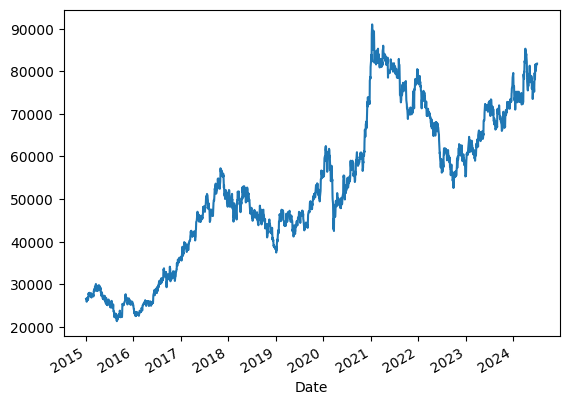

In [16]:
df['Close'].plot()

In [17]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7) # 0으로 나누기 에러 방지하기 위해 매우 작은 값을 더해서 나눔

In [18]:
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)

In [19]:
dfx

,Open,High,Low,Volume,Close
Date,,,,,
2015-01-02,0.296777,0.276849,0.296536,0.001943,0.075510
2015-01-05,0.295903,0.276033,0.293408,0.002246,0.076371
2015-01-06,0.291251,0.272107,0.287821,0.003374,0.065461
2015-01-07,0.286600,0.270868,0.286480,0.003172,0.068906
2015-01-08,0.296567,0.276653,0.292726,0.003206,0.070916
...,...,...,...,...,...
2024-06-27,0.900332,0.842975,0.899441,0.129999,0.865059
2024-06-28,0.906977,0.846074,0.902793,0.104710,0.863623
2024-07-01,0.902547,0.848140,0.908380,0.125320,0.867930


In [20]:
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
Date,,,,
2015-01-02,0.296777,0.276849,0.296536,0.001943
2015-01-05,0.295903,0.276033,0.293408,0.002246
2015-01-06,0.291251,0.272107,0.287821,0.003374
2015-01-07,0.286600,0.270868,0.286480,0.003172
2015-01-08,0.296567,0.276653,0.292726,0.003206
...,...,...,...,...
2024-06-27,0.900332,0.842975,0.899441,0.129999
2024-06-28,0.906977,0.846074,0.902793,0.104710
2024-07-01,0.902547,0.848140,0.908380,0.125320


In [21]:
dfx.describe()

,Open,High,Low,Volume
count,2338.000000,2338.000000,2338.000000,2338.000000
mean,0.583529,0.549303,0.583149,0.114668
std,0.197963,0.185875,0.198007,0.108542
min,0.000000,0.000000,0.000000,0.000000
25%,0.458056,0.432335,0.459218,0.002938
50%,0.566999,0.534814,0.565698,0.116372
75%,0.753045,0.709711,0.755028,0.173838
max,1.000000,1.000000,1.000000,1.000000


In [22]:
# 지난 30일간의 데이터로 오늘의 주가를 예측
# 5-25 ~ 7-3까지 30일간의 주가 데이터로 7-4 종가 예측
# 5월 26일 ~ 7월 4일까지 30일간의 삼성전자 주가 데이터로 7월5일 종가 예측

In [24]:
X = dfx.values.tolist()
y = dfy.values.tolist()

In [25]:
X[:2]

[[0.2967774086375451,
  0.276849173553433,
  0.2965363128488307,
  0.00194337758313033],
 [0.29590254706501007,
  0.2760330578509545,
  0.29340782122872244,
  0.002245582824306689]]

In [26]:
y[:2]

[[0.07550961814516866], [0.07637094458788922]]

In [29]:
len(y)

2338

In [33]:
# X[0:30]

In [28]:
window_size = 30

data_X = []
data_y = []
for i in range(len(y) - window_size): # 2338-30 = 2308 = range(2308) = i:0~2307
    _X = X[i : i + window_size]  # 30일간 주가 데이터(ex: 1/1 ~ 1/30)
    _y = y[i + window_size]      # 31일째의 종가 데이터(ex: 1/31)
    data_X.append(_X)            # 30일간 주가 데이터 단위가 data_X에 저장
    data_y.append(_y)            # 31일째의 종가 데이터 단위가 data_y에 저장
print(_X, "->", _y)

[[0.869324473974674, 0.8161157024784957, 0.8737430167588003, 0.1516018444674054], [0.8648947951263954, 0.8130165289247799, 0.8636871508370239, 0.21617021834508593], [0.8604651162781168, 0.8171487603297344, 0.8614525139655179, 0.20738434094048713], [0.85049833886949, 0.7954545454537237, 0.8458100558649767, 0.30885238337572374], [0.8338870431884453, 0.807851239668587, 0.8268156424571768, 0.4852957289953704], [0.8471760797332811, 0.8057851239661097, 0.8513966480437415, 0.20529129474720184], [0.8604651162781168, 0.807851239668587, 0.840223463686212, 0.3349147976887557], [0.8283499446280971, 0.7768595041314289, 0.821229050278412, 0.31616079816998527], [0.8250276854918881, 0.7716942148752358, 0.821229050278412, 0.29011056464055573], [0.8239202657798185, 0.7892561983462921, 0.8290502793286826, 0.1739224106452871], [0.8294573643401667, 0.7861570247925763, 0.8368715083789532, 0.1561139389169357], [0.8637873754143258, 0.8057851239661097, 0.8581005586582591, 0.25665982959283035], [0.8682170542626

In [34]:
len(data_X)

2308

In [35]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (1615, 30, 4) (1615, 1)
테스트 데이터의 크기 : (693, 30, 4) (693, 1)


In [36]:
# 2388건의 주가 데이터 -> 2308개의 훈련 데이터 -> 7:3의 비율로 나눔
# 훈련 데이터의 크기 : (1615, 30, 4) (1615, 1)
# 테스트 데이터의 크기 : (693, 30, 4) (693, 1)

# (1615, 30, 4)를 x데이터, (1615, 1)를 y데이터로 하여 훈련 진행
# => model => model로 (693, 30, 4) 데이터를 예측했을 때 (693, 1)과 비교하여 모델 성능 평가

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [38]:
model = Sequential()

In [39]:
model.add(LSTM(units=20, return_sequences=False, input_shape=(30, 4)))
model.add(Dense(1)) # linear(연속형 값 예측)

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                2000      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 2021 (7.89 KB)
Trainable params: 2021 (7.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=40)
pred_y = model.predict(test_X)

Epoch 1/70
41/41 [==============================] - 3s 11ms/step - loss: 0.0260
Epoch 2/70
41/41 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 3/70
41/41 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 4/70
41/41 [==============================] - 0s 11ms/step - loss: 0.0010
Epoch 5/70
41/41 [==============================] - 0s 12ms/step - loss: 9.4081e-04
Epoch 6/70
41/41 [==============================] - 0s 11ms/step - loss: 9.0371e-04
Epoch 7/70
41/41 [==============================] - 0s 12ms/step - loss: 9.0909e-04
Epoch 8/70
41/41 [==============================] - 0s 11ms/step - loss: 8.7133e-04
Epoch 9/70
41/41 [==============================] - 0s 12ms/step - loss: 8.7778e-04
Epoch 10/70
41/41 [==============================] - 0s 11ms/step - loss: 8.6404e-04
Epoch 11/70
41/41 [==============================] - 1s 14ms/step - loss: 8.6435e-04
Epoch 12/70
41/41 [==============================] - 1s 16ms/step - loss: 8.9729e-04
Epoch

22/22 [==============================] - 0s 7ms/step


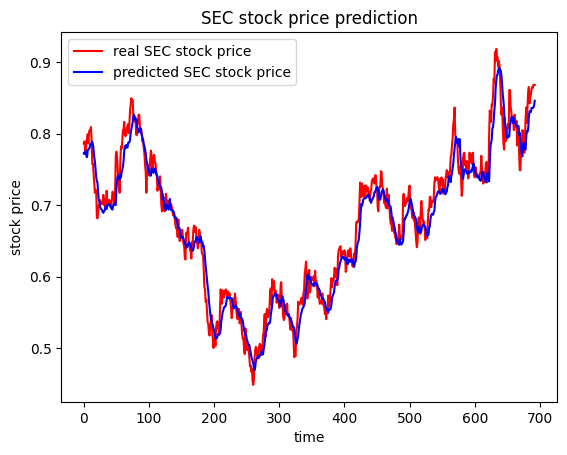

내일 예상되는 삼성전자 주가 : [79708.62713906] KRW


In [42]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 예상되는 삼성전자 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')